In [139]:
import cv2
import glob
import os
from matplotlib import pyplot as plt
from matplotlib import patches
from math import ceil, floor
from pascal_voc_writer import Writer
import shutil

cv2.__version__

'4.1.0'

In [142]:
base_data_dir = '../data/chest_xray/'

data_dir = base_data_dir + 'prepared/'
recognition_dir = base_data_dir + 'recognition/'
recognition_images_dir = recognition_dir + 'images/'
recognition_annotations_dir = recognition_dir + 'annotations/'

for directory in [data_dir, recognition_images_dir, recognition_annotations_dir]:
    if os.path.exists(directory):
        shutil.rmtree(directory)
    if not os.path.exists(directory):
        os.makedirs(directory)

In [58]:
bddl = len(base_data_dir)

file_names_normal = [path[bddl:] for path in glob.glob(base_data_dir + 'train/NORMAL/*.jpeg')] + [path[bddl:] for path
                                                                                                  in glob.glob(
        '../data/chest_xray/test/NORMAL/*.jpeg')] + [path[bddl:] for path in
                                                     glob.glob('../data/chest_xray/val/NORMAL/*.jpeg')]
file_names_pneumonia = [path[bddl:] for path in glob.glob(base_data_dir + 'train/PNEUMONIA/*.jpeg')] + [path[bddl:] for
                                                                                                        path in
                                                                                                        glob.glob(
                                                                                                            '../data/chest_xray/test/PNEUMONIA/*.jpeg')] + [
                           path[bddl:] for path in glob.glob('../data/chest_xray/val/PNEUMONIA/*.jpeg')]

In [59]:
image_sizes = [cv2.imread(base_data_dir + image, 0).shape for image in file_names_normal + file_names_pneumonia]

min width: 127
min height: 384
max width: 2713
max height: 2916


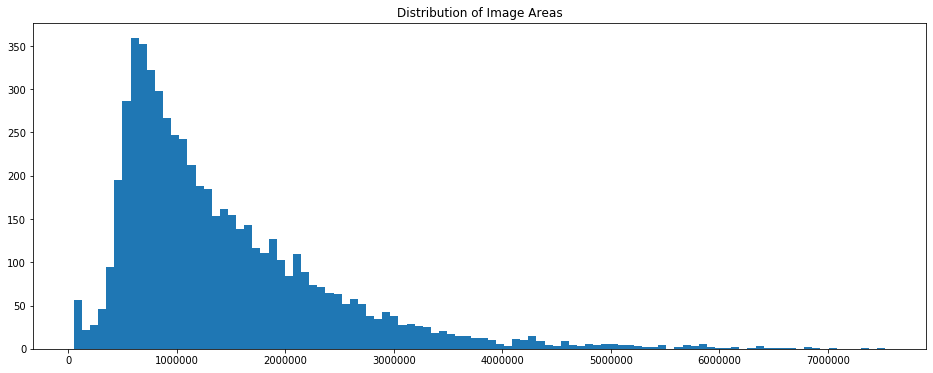

In [102]:
widths = [shape[0] for shape in image_sizes]
heights = [shape[1] for shape in image_sizes]
areas = [shape[0] * shape[1] for shape in image_sizes]

print('min width:', min(widths))
print('min height:', min(heights))
print('max width:', max(widths))
print('max height:', max(heights))

plt.figure(figsize = (16, 6))
plt.title('Distribution of Image Areas')
plt.hist(areas, bins = 100)
plt.show()

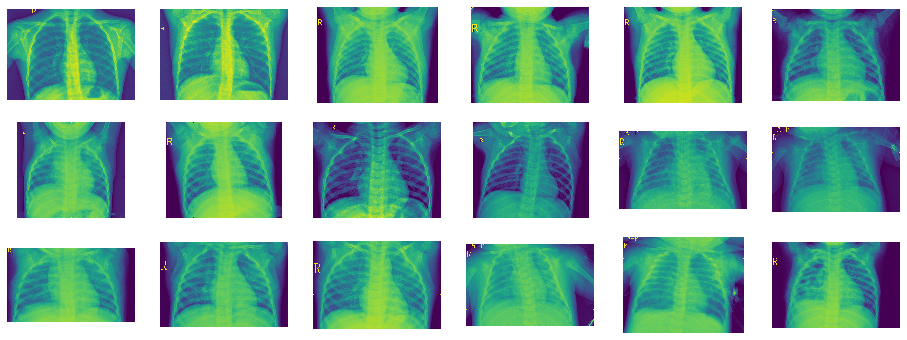

In [103]:
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

example_images = [
    file_names_normal[1557],
    file_names_normal[1434],
    file_names_normal[1582],
    file_names_normal[1579],
    file_names_normal[1577],
    file_names_normal[1578],
    file_names_normal[1576],
    file_names_normal[1580],
    file_names_normal[1575],
    file_names_normal[1581],
    file_names_pneumonia[4268],
    file_names_pneumonia[4270],
    file_names_pneumonia[4269],
    file_names_pneumonia[4271],
    file_names_pneumonia[4265],
    file_names_pneumonia[4266],
    file_names_pneumonia[4267],
    file_names_pneumonia[4272],
]

examples = [cv2.imread(base_data_dir + file, 0) for file in example_images]

fig = plt.figure(figsize = (16, 6))

i = 1
for example in examples:
    plt.subplot(3, 6, i)
    plt.axis('off')
    ax = plt.imshow(example)
    i += 1

plt.show()

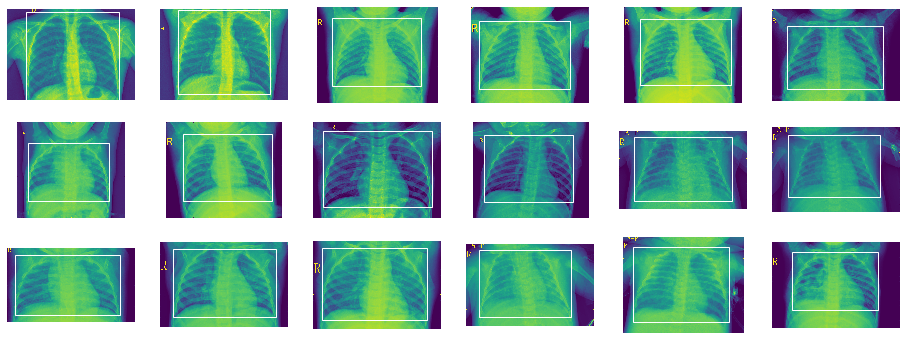

In [133]:
ROIs = [
    [272, 41, 1631, 1317],
    [301, 20, 1810, 1409],
    [224, 174, 1532, 1174],
    [79, 157, 1070, 891],
    [232, 182, 1568, 1162],
    [149, 170, 1112, 807],
    [121, 246, 1057, 906],
    [189, 140, 1221, 916],
    [121, 116, 1521, 1090],
    [154, 175, 1368, 1091],
    [107, 45, 856, 533],
    [133, 64, 904, 582],
    [69, 61, 1019, 604],
    [144, 71, 1286, 830],
    [86, 64, 1121, 778],
    [100, 48, 831, 585],
    [101, 101, 1046, 849],
    [254, 131, 1381, 886],
]

fig = plt.figure(figsize = (16, 6))

i = 1
for example in examples:
    ROI = ROIs[i - 1]
    img_path = base_data_dir + example_images[i - 1]
    img = cv2.imread(img_path, 0)
    writer = Writer(img_path, img.shape[0], img.shape[1], depth = 1)
    writer.addObject('ROI', ROI[0], ROI[1], ROI[2], ROI[3])
    writer.save(os.path.basename(img_path)[:-5] + '.xml')

    ax = plt.subplot(3, 6, i)
    plt.axis('off')
    plt.imshow(example)
    rect = patches.Rectangle((ROI[0], ROI[1]), ROI[2] - ROI[0], ROI[3] - ROI[1], linewidth = 1, edgecolor = 'w',
                             facecolor = 'none')
    ax.add_patch(rect)
    i += 1

plt.show()

In [134]:
test_size = 0.3

train_set = example_images[0:floor(len(example_images) * (1 - test_size))]
test_set = example_images[-ceil(len(example_images) * test_size):]

In [21]:
# h_crop = 0.3
# v_crop = 0.3
# target_width = 256
# target_height = 256

# img = cv2.imread(file_names_normal[6], 0)

# plt.imshow(img)
# plt.title('Original')
# plt.show()

# print(img.shape)

# width = img.shape[0]
# height = img.shape[1]

# resized = cv2.resize(img, (int(target_width + 2 * target_width * h_crop),int(target_height + 2 * target_height * v_crop)))

# crop_h_from = floor(target_width * h_crop)
# crop_h_to = ceil(target_width + target_width * h_crop)

# crop_v_from = floor(target_height * v_crop)
# crop_v_to = ceil(target_height + target_height * v_crop)

# cropped = resized[crop_h_from:crop_h_to, crop_v_from:crop_v_to]

# plt.imshow(cropped)
# plt.title('Cropped')
# plt.show()